In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u

from astropy.io import fits
from scipy.signal import find_peaks
from scipy.signal import resample

from rascal.calibrator import Calibrator
from rascal.util import refine_peaks

c:\users\josh\appdata\local\conda\conda\envs\astro\lib\site-packages\rascal\calibrator.py:36: TqdmExperimentalWarning:

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)



Info: https://www.eso.org/sci/facilities/lasilla/instruments/efosc/inst/Perf_HeAr.html

Manual: https://www.eso.org/sci/facilities/lasilla/instruments/efosc/doc/manual/EFOSC2manual_v4.2.pdf

Grism #11

In [2]:
data = fits.open('EFOSC_spec_HeAr227_0005.fits')[0]

c:\users\josh\appdata\local\conda\conda\envs\astro\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning:

divide by zero encountered in log



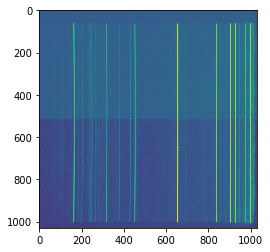

In [3]:
plt.imshow(np.log(data.data.T))

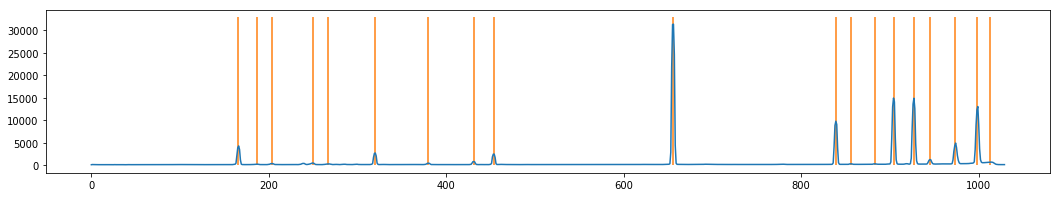

In [4]:
spectrum = np.median(data.data.T, axis=0)
peaks, _ = find_peaks(spectrum, prominence=80, distance=15, threshold=None)
peaks_refined = refine_peaks(spectrum, peaks, window_width=3)

plt.figure(figsize=(18,3))
plt.plot(spectrum)
plt.vlines(peaks_refined,
              0,
              1.05*spectrum.max(),
              colors='C1')

In [8]:
c = Calibrator(peaks_refined,
               min_wavelength=3300.,
               max_wavelength=7500.,
               num_pixels=len(spectrum))

c.set_fit_constraints(ransac_thresh=1)
c.add_atlas(["Ar", "He"])

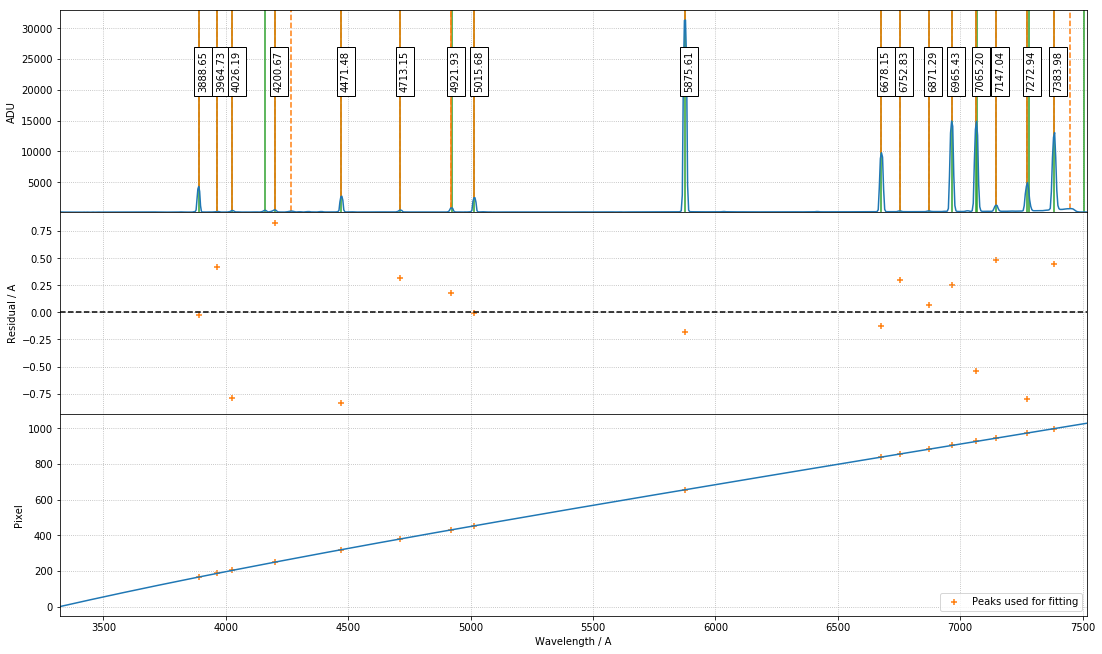

Stdev error: 0.4780823191738993 A


In [9]:
best_p = c.fit(max_tries=2000)
best_p, x_fit, y_fit = c.match_peaks_to_atlas(best_p, polydeg=5, tolerance=5)
c.plot_fit(spectrum, best_p, plot_atlas=True, log_spectrum=False)

fit_diff = c.polyval(best_p,x_fit)-y_fit

rms = np.sqrt(np.sum(fit_diff**2/len(x_fit)))

print("Stdev error: {} A".format(fit_diff.std()))